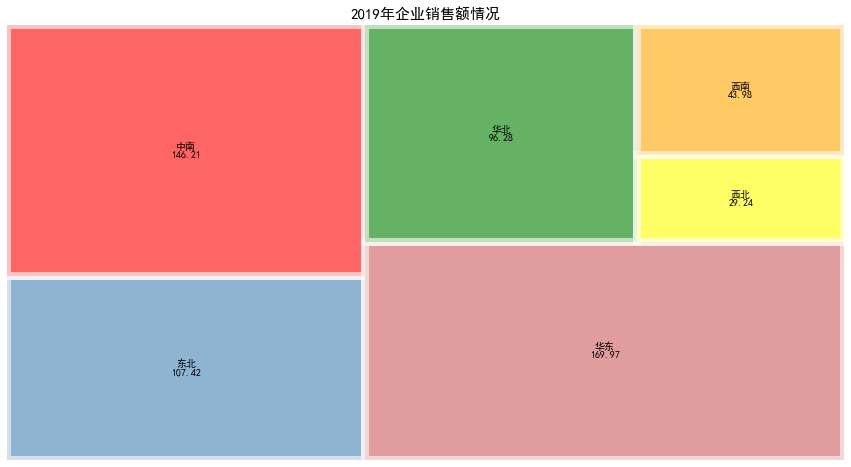

In [2]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import squarify
import pymysql
plt.rcParams['font.sans-serif']=['SimHei']

#连接Hadoop数据库
v1 = []
v2 = []
conn = pymysql.connect(host='lylg102',port=3306,user='root',password='000000',db='test',charset='utf8')
cursor = conn.cursor()

#读取Hadoop订单表数据
sql_num = "SELECT region, ROUND(SUM(sales/10000),2) FROM orders WHERE dt=2019 GROUP BY region"
cursor.execute(sql_num)
sh = cursor.fetchall()
for s in sh:
    v1.append(s[0])
    v2.append(s[1])

plt.figure(figsize=(15,8))
colors = ['steelblue','red','indianred','green','yellow','orange']   #设置颜色数据
plot=squarify.plot(
    sizes=v2,            #指定绘图数据
    label=v1,            #标签
    color=colors,        #指定自定义颜色
    alpha=0.6,           #指定透明度
    value=v2,            #添加数值标签
    edgecolor='white',   #设置边界框白色
    linewidth=8          #设置边框宽度为3
)

plt.rc('font',size=15)      #设置标签大小
plot.set_title('2019年企业销售额情况',fontdict={'fontsize':15})    #设置标题及大小
plt.axis('off')    #去除坐标轴
plt.tick_params(top='off',right='off')    #去除上边框和右边框刻度
plt.show()